#### Importing Library

In [1]:
import pandas as pd
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#_________________________________

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn import metrics
import pandas_profiling

/home/rohan/anaconda3/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/rohan/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/rohan/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/rohan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/rohan/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/rohan/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
   

#### Loading Datasets

In [121]:
Active =  pd.read_excel('/home/rohan/Documents/ROHAN_DA/ALABS/___STATS___ -  cls 10 onwards/Class_20 Case_study_ML/Case_study/5. TELECOM CASE STUDY - SEGMENTATION-CLASSIFICATION/Case_study_data.xlsx',sheet_name=
                     0)
churn = pd.read_excel('/home/rohan/Documents/ROHAN_DA/ALABS/___STATS___ -  cls 10 onwards/Class_20 Case_study_ML/Case_study/5. TELECOM CASE STUDY - SEGMENTATION-CLASSIFICATION/Case_study_data.xlsx',sheet_name=
                     1)

#### Analysing DS

In [5]:
Active.shape

(9999, 29)

In [6]:
Active.head(2)

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,UPGRADE_DATE,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,COMPANY_SOURCE_NAME,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-11112345,Active,37222.0,37969.0,NaN,HN9000,Vars,Indirect,UNKNOWN,HNS Customers,...,Broadband Remote,0,HN7000 Upgrade,2.0,1-5-1943,69,0,1.0,0.0,N
1,AMR-14837287,Active,37743.0,38937.0,Pro,HN7000S,Sales Agents,Indirect,NCC,HNS Customers,...,Spaceway,0,Retail,2.0,28-12-1969,43,4,1.0,0.0,N


In [7]:
Churn.head(2)

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,CHURN_DATE,UPGRADE_DATE,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-53205840,Closed,37274,38809,37989.0,Professional,DW6000,NaN,Indirect,Perfect 10,...,Broadband Remote,NaN,Dealer-Generated Sale,2.0,27-10-1964,48.0,0,.,NaN,N
1,AMR-53383136,Closed,37258,38907,38196.0,SO,DW6000,Retail/Others,Indirect,ValueElectronics,...,Broadband Remote,NaN,National Sales,NaN,22-10-1965,47.0,5,0,0.0,Y


In [8]:
Churn.shape

(10000, 30)

#### Difference(columns) in Active & churn customers

- Only `Churn Date` is extra in Churn 

In [6]:
# np.intersect1d(Active.columns,Churn.columns)
list(np.setdiff1d(Active.columns,Churn.columns))

[]

In [7]:
list(np.setdiff1d(Churn.columns,Active.columns))

['CHURN_DATE']

## Feature Engg

### Analysis - S1

- `ADDRESS` has a high cardinality: 9911 distinct values Warning - Drop -> Done
- `AGE` has a high cardinality: 64 distinct values Warning - Fine 
- `CITY` has a high cardinality: 829 distinct values Warning - Fine
- `COMPUTER_OWNER` has 3055 / 30.6% missing values Missing - Drop -> Done
- `DATE_OF_BIRTH` has a high cardinality: 7188 distinct values Warning - drop -> Done
- `EMAIL_ADDRESS` has a high cardinality: 9927 distinct values Warning - drop -> Done
- `FEEDBACK` has 1914 / 19.1% missing values Missing - fix it()
- `FIRST_NAME` has a high cardinality: 577 distinct values Warning - keep
- `GENDER` has 1271 / 12.7% missing values Missing - fix
- `INCOME` has 318 / 3.2% missing values Missing - fix
- `LAST_NAME` has a high cardinality: 879 distinct values Warning - fine
- `MARITAL_STATUS` has 4654 / 46.5% zeros Zeros -> Drop - Done
- `MARITAL_STATUS` has 319 / 3.2% missing values Missing -> Drop - Done
- `MODEL` has 676 / 6.8% missing values Missing - fix it 
- `PRESENCE_OF_CHILDREN` has 6643 / 66.4% zeros Zeros - drop -> Done
- `PRESENCE_OF_CHILDREN` has 1315 / 13.2% missing values Missing - drop -> Done
- `SALES_CHANNEL` has 2906 / 29.1% missing values Missing - how bought 
- `SALES_SOURCE` has 693 / 6.9% missing values Missing - dealer
- `SATELLITE` has 396 / 4.0% missing values Missing - fix
- `SERVICE_ PLAN` has 1239 / 12.4% missing values Missing - fix
- `WARRANTY_NAME` has 957 / 9.6% missing values Missing - fix
- `ZIPCODE` has a high cardinality: 897 distinct values Warning - fine


In [27]:
pandas_profiling.ProfileReport(Active)

Number of variables,24
Number of observations,9827
Total Missing (%),0.0%
Total size in memory,1.8 MiB
Average record size in memory,192.0 B
Numeric,2
Categorical,19
Boolean,0
Date,0
Text (Unique),1
Rejected,2


#### Dropping all variables' null rows which have less than 100 null values 

In [122]:
Active.isnull().sum().sort_values(ascending =  False)

COMPUTER_OWNER               3055
SALES_CHANNEL                2906
FEEDBACK                     1914
PRESENCE_OF_CHILDREN         1315
GENDER                       1271
SERVICE_PLAN                 1239
WARRANTY_NAME                 957
SALES_SOURCE                  693
MODEL                         676
SATELLITE                     396
MARITAL_STATUS                319
INCOME                        318
ADDRESS                        54
DIRECT_INDIRECT_CHANNEL        45
STATE                          22
ZIPCODE                        22
EMAIL_ADDRESS                  20
COMPANY_SOURCE_NAME            11
SITE_TYPE_DESC                 11
UPGRADE_DATE                   10
FIRST_COMMUNICATION_DATE       10
MOST_RECENT_SALES_CHANNEL       7
CITY                            1
LAST_NAME                       1
FIRST_NAME                      1
DATE_OF_BIRTH                   1
AGE                             1
ACCOUNT_STATUS                  1
SITE_ACCOUNT_NUMBER             1
dtype: int64

- Columns with less than 100 null values

In [123]:
Active[Active.columns[Active.isnull().sum() < 100]].columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'DIRECT_INDIRECT_CHANNEL', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'SITE_TYPE_DESC', 'MOST_RECENT_SALES_CHANNEL',
       'DATE_OF_BIRTH', 'AGE'],
      dtype='object')

-  Dropping NA rows for columns with < 100 null values 

In [124]:
Active.dropna(subset= Active[Active.columns[Active.isnull().sum() < 100]].columns,inplace=True)

#### After Dropping the rows

In [125]:
Active.isnull().sum().sort_values(ascending =  False)

COMPUTER_OWNER               2982
SALES_CHANNEL                2855
FEEDBACK                     1875
PRESENCE_OF_CHILDREN         1280
GENDER                       1254
SERVICE_PLAN                 1209
WARRANTY_NAME                 934
SALES_SOURCE                  683
MODEL                         657
SATELLITE                     380
MARITAL_STATUS                315
INCOME                        303
FIRST_COMMUNICATION_DATE        0
UPGRADE_DATE                    0
FIRST_NAME                      0
ACCOUNT_STATUS                  0
DIRECT_INDIRECT_CHANNEL         0
COMPANY_SOURCE_NAME             0
STATE                           0
LAST_NAME                       0
ADDRESS                         0
CITY                            0
ZIPCODE                         0
EMAIL_ADDRESS                   0
SITE_TYPE_DESC                  0
MOST_RECENT_SALES_CHANNEL       0
DATE_OF_BIRTH                   0
AGE                             0
SITE_ACCOUNT_NUMBER             0
dtype: int64

In [126]:
pandas_profiling.ProfileReport(Active)

Number of variables,30
Number of observations,9827
Total Missing (%),5.0%
Total size in memory,2.2 MiB
Average record size in memory,240.0 B
Numeric,5
Categorical,22
Boolean,0
Date,0
Text (Unique),1
Rejected,2


### Applying corrective measures based on Analysis done earlier - Pandas Profiling - S2

#### Dropping `ADDRESS`,`COMPUTER_OWNER`,`DATE_OF_BIRTH`,`EMAIL_ADDRESS`,`PRESENCE_OF_CHILDREN` columns

- This is based on the results obtained from pandas profiling

In [127]:
Active.drop(columns=['ADDRESS','COMPUTER_OWNER','DATE_OF_BIRTH','EMAIL_ADDRESS','PRESENCE_OF_CHILDREN','MARITAL_STATUS'],inplace=True)

In [128]:
Active.shape

(9827, 23)

#### Fixing the remaining columns

In [93]:
cols = ['FEEDBACK','GENDER','INCOME','MODEL','SALES_CHANNEL','SALES_SOURCE',
        'SATELLITE','SERVICE_PLAN','WARRANTY_NAME']
for x in cols:
    print(Active[x].value_counts(dropna = False))

GOOD    4943
BAD     3009
NaN     1875
Name: FEEDBACK, dtype: int64
 1.0    4682
 2.0    3891
NaN     1254
Name: GENDER, dtype: int64
0      2687
6      1510
7       998
4       950
5       866
3       664
8       586
9       459
NaN     303
A       189
2       168
1       155
D       154
C        96
B        42
Name: INCOME, dtype: int64
HN7000S    4221
HN9000     1960
UNK         956
NaN         657
DW4020      648
DW4000      631
DW6000      506
DW7000      248
Name: MODEL, dtype: int64
NaN              2855
Sales Agents     1430
Retail/others    1415
Vars             1395
Web orders       1369
Call Center      1363
Name: SALES_CHANNEL, dtype: int64
TAG                                        1684
Hughes Web Order                           1359
RS&I                                       1042
Perfect 10                                  841
AmericanSat                                 802
NaN                                         683
NCC                                         582
ACS

In [94]:
cols = ['FEEDBACK','GENDER','INCOME','MODEL','SALES_CHANNEL','SALES_SOURCE',
        'SATELLITE','SERVICE_PLAN','WARRANTY_NAME']

def cat_imputer(DF,column):
    for x in cols:
        DF['{0}'.format(x)] = DF['{0}'.format(x)].fillna(pd.Series(np.random.choice(DF['{0}'.format(x)].value_counts().index.tolist(), 
                                                          p= DF['{0}'.format(x)].value_counts(normalize= True).values.tolist(), size=len(DF))))

        DF['{0}'.format(x)] = DF['{0}'.format(x)].fillna(method = 'ffill')
        DF['{0}'.format(x)] = DF['{0}'.format(x)].apply(str)

In [95]:
cat_imputer(Active,cols)

In [96]:
for x in cols:
    print(Active[x].value_counts())

GOOD    6093
BAD     3734
Name: FEEDBACK, dtype: int64
1.0    5361
2.0    4466
Name: GENDER, dtype: int64
0    2779
6    1560
7    1034
4     982
5     887
3     689
8     605
9     471
A     194
2     171
1     157
D     156
C      99
B      43
Name: INCOME, dtype: int64
HN7000S    4546
HN9000     2093
UNK        1018
DW4020      698
DW4000      678
DW6000      529
DW7000      265
Name: MODEL, dtype: int64
Sales Agents     2017
Retail/others    1975
Web orders       1957
Vars             1947
Call Center      1931
Name: SALES_CHANNEL, dtype: int64
TAG                                        1819
Hughes Web Order                           1461
RS&I                                       1109
Perfect 10                                  896
AmericanSat                                 859
NCC                                         627
ACS                                         454
LiveBridge Communications LLC               453
InfoDish                                    394
ACS Pre-Insta

In [97]:
### Checking for remaining changes req - S3

#### Correl bw UPGRADE_DATE & FIRST_COMMUNICATION_DATE

In [98]:
pd.DataFrame(np.corrcoef(Active.UPGRADE_DATE,Active.FIRST_COMMUNICATION_DATE),
             columns= ['upgrade','first_Comm_date'])

,upgrade,first_Comm_date
0,1.000000,0.994485
1,0.994485,1.000000


(35000, 50000)

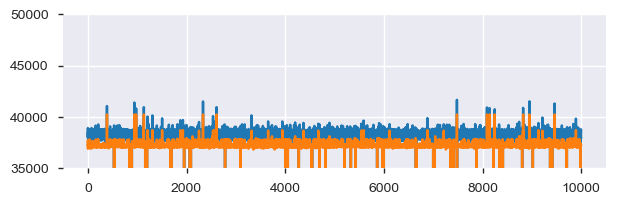

In [99]:
plt.figure(figsize=[7,2])
x = Active[['UPGRADE_DATE','FIRST_COMMUNICATION_DATE']]
x.apply(lambda x:pd.to_datetime(x))

plt.plot(Active.UPGRADE_DATE)
plt.plot(Active.FIRST_COMMUNICATION_DATE)
plt.ylim(35000,50000)

#### Dropping Cols 

- `COMPANY_SOURCE_NAME` has constant value HNS Customers Rejected - drop - done
- `UPGRADE_DATE` is highly correlated with FIRST_COMMUNICATION_DATE (ρ = 0.99449) Rejected
- `ZIPCODE` has a high cardinality: 896 distinct values Warning - drop - done

- `WARRANTY_NAME` has 9260 values as 0 - drop - done

In [100]:
Active.drop(columns= ['COMPANY_SOURCE_NAME','ZIPCODE','WARRANTY_NAME','UPGRADE_DATE'],inplace=True)

In [101]:
Active.shape

(9827, 19)

In [102]:
pandas_profiling.ProfileReport(Active)

Number of variables,20
Number of observations,9827
Total Missing (%),0.0%
Total size in memory,1.5 MiB
Average record size in memory,160.0 B
Numeric,2
Categorical,17
Boolean,0
Date,0
Text (Unique),1
Rejected,0


#### Outliers  

- All columns are categorical (nominal or ordinal) in nature so outlier detection in not an issue

#### Correlation

- Using Chi Square test for correlation

In [103]:
def chi_p_val(DF):
    li = []
    lt = []
    for x in DF.columns:
        scipy.stats.chisquare(DF[x].value_counts())
        for y in DF.columns:
            if x != y:
                f = x,y
                lt.append([x,y])
                con = pd.crosstab(DF[x],DF[y])
                chi_stat,p_value,Dof,cont_table = scipy.stats.chi2_contingency(con)
                li.extend([p_value])
            else:
                pass
    chi_P_value = pd.DataFrame(np.vstack(lt),columns=['1st_col','2nd_col'])

    chi_P_value['chi_square_p_value'] = li
    return chi_P_value

In [104]:
final = chi_p_val(Active)
final.head(2)

,1st_col,2nd_col,chi_square_p_value
0,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,0.495257
1,SITE_ACCOUNT_NUMBER,FIRST_COMMUNICATION_DATE,0.448114


- Dependent Pair of vars for significane level of 0.05

In [105]:
final[final.chi_square_p_value < 0.05].sort_values(by = 'chi_square_p_value',ascending=False).head()

,1st_col,2nd_col,chi_square_p_value
259,SITE_TYPE_DESC,SALES_SOURCE,0.038049
139,SALES_SOURCE,SITE_TYPE_DESC,0.038049
118,DIRECT_INDIRECT_CHANNEL,STATE,0.036169
204,STATE,DIRECT_INDIRECT_CHANNEL,0.036169
124,DIRECT_INDIRECT_CHANNEL,AGE,0.026047


In [106]:
final[final.chi_square_p_value < 0.05]['1st_col'].value_counts()

MOST_RECENT_SALES_CHANNEL    8
AGE                          8
SALES_SOURCE                 8
SATELLITE                    8
DIRECT_INDIRECT_CHANNEL      8
MODEL                        7
ACCOUNT_STATUS               6
CITY                         4
FEEDBACK                     4
SITE_TYPE_DESC               4
STATE                        3
FIRST_NAME                   3
LAST_NAME                    3
FIRST_COMMUNICATION_DATE     2
INCOME                       2
SALES_CHANNEL                1
GENDER                       1
Name: 1st_col, dtype: int64

In [107]:
# Active.groupby(by = 'SATELLITE',sort = True).count()

### --------------------------------------------------- CHURN --------------------------------------------------------

In [129]:
churn.head(2)

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,CHURN_DATE,UPGRADE_DATE,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-53205840,Closed,37274,38809,37989.0,Professional,DW6000,NaN,Indirect,Perfect 10,...,Broadband Remote,NaN,Dealer-Generated Sale,2.0,27-10-1964,48.0,0,.,NaN,N
1,AMR-53383136,Closed,37258,38907,38196.0,SO,DW6000,Retail/Others,Indirect,ValueElectronics,...,Broadband Remote,NaN,National Sales,NaN,22-10-1965,47.0,5,0,0.0,Y


#### Dropping all variables' null rows which have less than 100 null values 

In [130]:
churn.isnull().sum().sort_values(ascending =  False)

COMPUTER_OWNER               3243
SALES_CHANNEL                2602
FEEDBACK                     2028
SERVICE_PLAN                 1482
PRESENCE_OF_CHILDREN         1252
GENDER                       1238
SATELLITE                    1013
UPGRADE_DATE                  879
DIRECT_INDIRECT_CHANNEL       784
MODEL                         710
WARRANTY_NAME                 681
SALES_SOURCE                  290
MARITAL_STATUS                281
SITE_TYPE_DESC                 63
ZIPCODE                        45
STATE                          45
FIRST_NAME                     26
MOST_RECENT_SALES_CHANNEL      21
EMAIL_ADDRESS                  20
ACCOUNT_STATUS                 15
ADDRESS                         9
AGE                             8
COMPANY_SOURCE_NAME             8
DATE_OF_BIRTH                   8
LAST_NAME                       7
FIRST_COMMUNICATION_DATE        0
CITY                            0
CHURN_DATE                      0
INCOME                          0
SITE_ACCOUNT_N

- Columns with less than 100 null values

In [131]:
churn[churn.columns[churn.isnull().sum() < 100]].columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'CHURN_DATE', 'COMPANY_SOURCE_NAME', 'FIRST_NAME', 'LAST_NAME',
       'ADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'EMAIL_ADDRESS',
       'SITE_TYPE_DESC', 'MOST_RECENT_SALES_CHANNEL', 'DATE_OF_BIRTH', 'AGE',
       'INCOME'],
      dtype='object')

-  Dropping NA rows for columns with < 100 null values 

In [132]:
churn.dropna(subset= churn[churn.columns[churn.isnull().sum() < 100]].columns,inplace=True)

#### After Dropping the rows

In [133]:
churn.isnull().sum().sort_values(ascending =  False)

COMPUTER_OWNER               3173
SALES_CHANNEL                2554
FEEDBACK                     1993
SERVICE_PLAN                 1456
PRESENCE_OF_CHILDREN         1230
GENDER                       1209
SATELLITE                     990
UPGRADE_DATE                  868
DIRECT_INDIRECT_CHANNEL       769
MODEL                         697
WARRANTY_NAME                 677
SALES_SOURCE                  283
MARITAL_STATUS                275
FIRST_COMMUNICATION_DATE        0
CHURN_DATE                      0
FIRST_NAME                      0
ACCOUNT_STATUS                  0
COMPANY_SOURCE_NAME             0
CITY                            0
LAST_NAME                       0
ADDRESS                         0
STATE                           0
ZIPCODE                         0
EMAIL_ADDRESS                   0
SITE_TYPE_DESC                  0
MOST_RECENT_SALES_CHANNEL       0
DATE_OF_BIRTH                   0
AGE                             0
INCOME                          0
SITE_ACCOUNT_N

In [114]:
pandas_profiling.ProfileReport(Active)

Number of variables,20
Number of observations,9827
Total Missing (%),0.0%
Total size in memory,1.5 MiB
Average record size in memory,160.0 B
Numeric,2
Categorical,17
Boolean,0
Date,0
Text (Unique),1
Rejected,0


### Applying corrective measures based on Analysis done earlier - Pandas Profiling - S2

#### Dropping `ADDRESS`,`COMPUTER_OWNER`,`DATE_OF_BIRTH`,`EMAIL_ADDRESS`,`PRESENCE_OF_CHILDREN` columns

- This is based on the results obtained from pandas profiling

In [134]:
churn.drop(columns=['ADDRESS','COMPUTER_OWNER','DATE_OF_BIRTH','EMAIL_ADDRESS','PRESENCE_OF_CHILDREN','MARITAL_STATUS'],inplace=True)

In [138]:
churn.shape

(9801, 24)

#### Fixing the remaining columns

In [137]:
pandas_profiling.ProfileReport(churn)

Number of variables,25
Number of observations,9801
Total Missing (%),4.3%
Total size in memory,1.9 MiB
Average record size in memory,200.0 B
Numeric,4
Categorical,16
Boolean,0
Date,0
Text (Unique),1
Rejected,4


In [136]:
cols = ['FEEDBACK','GENDER','INCOME','MODEL','SALES_CHANNEL','SALES_SOURCE',
        'SATELLITE','SERVICE_PLAN','WARRANTY_NAME']
for x in cols:
    print(Active[x].value_counts(dropna = False))

GOOD    4943
BAD     3009
NaN     1875
Name: FEEDBACK, dtype: int64
 1.0    4682
 2.0    3891
NaN     1254
Name: GENDER, dtype: int64
0      2687
6      1510
7       998
4       950
5       866
3       664
8       586
9       459
NaN     303
A       189
2       168
1       155
D       154
C        96
B        42
Name: INCOME, dtype: int64
HN7000S    4221
HN9000     1960
UNK         956
NaN         657
DW4020      648
DW4000      631
DW6000      506
DW7000      248
Name: MODEL, dtype: int64
NaN              2855
Sales Agents     1430
Retail/others    1415
Vars             1395
Web orders       1369
Call Center      1363
Name: SALES_CHANNEL, dtype: int64
TAG                                        1684
Hughes Web Order                           1359
RS&I                                       1042
Perfect 10                                  841
AmericanSat                                 802
NaN                                         683
NCC                                         582
ACS

In [ ]:
cols = ['FEEDBACK','GENDER','INCOME','MODEL','SALES_CHANNEL','SALES_SOURCE',
        'SATELLITE','SERVICE_PLAN','WARRANTY_NAME']

def cat_imputer(DF,column):
    for x in cols:
        DF['{0}'.format(x)] = DF['{0}'.format(x)].fillna(pd.Series(np.random.choice(DF['{0}'.format(x)].value_counts().index.tolist(), 
                                                          p= DF['{0}'.format(x)].value_counts(normalize= True).values.tolist(), size=len(DF))))

        DF['{0}'.format(x)] = DF['{0}'.format(x)].fillna(method = 'ffill')
        DF['{0}'.format(x)] = DF['{0}'.format(x)].apply(str)

In [ ]:
cat_imputer(Active,cols)

In [ ]:
for x in cols:
    print(Active[x].value_counts())

In [ ]:
### Checking for remaining changes req - S3

#### Correl bw UPGRADE_DATE & FIRST_COMMUNICATION_DATE

In [ ]:
pd.DataFrame(np.corrcoef(Active.UPGRADE_DATE,Active.FIRST_COMMUNICATION_DATE),
             columns= ['upgrade','first_Comm_date'])

In [ ]:
plt.figure(figsize=[7,2])
x = Active[['UPGRADE_DATE','FIRST_COMMUNICATION_DATE']]
x.apply(lambda x:pd.to_datetime(x))

plt.plot(Active.UPGRADE_DATE)
plt.plot(Active.FIRST_COMMUNICATION_DATE)
plt.ylim(35000,50000)

#### Dropping Cols 

- `COMPANY_SOURCE_NAME` has constant value HNS Customers Rejected - drop - done
- `UPGRADE_DATE` is highly correlated with FIRST_COMMUNICATION_DATE (ρ = 0.99449) Rejected
- `ZIPCODE` has a high cardinality: 896 distinct values Warning - drop - done

- `WARRANTY_NAME` has 9260 values as 0 - drop - done

In [ ]:
Active.drop(columns= ['COMPANY_SOURCE_NAME','ZIPCODE','WARRANTY_NAME','UPGRADE_DATE'],inplace=True)

In [ ]:
Active.shape

In [ ]:
pandas_profiling.ProfileReport(Active)

#### Outliers  

- All columns are categorical (nominal or ordinal) in nature so outlier detection in not an issue

#### Correlation

- Using Chi Square test for correlation

In [ ]:
def chi_p_val(DF):
    li = []
    lt = []
    for x in DF.columns:
        scipy.stats.chisquare(DF[x].value_counts())
        for y in DF.columns:
            if x != y:
                f = x,y
                lt.append([x,y])
                con = pd.crosstab(DF[x],DF[y])
                chi_stat,p_value,Dof,cont_table = scipy.stats.chi2_contingency(con)
                li.extend([p_value])
            else:
                pass
    chi_P_value = pd.DataFrame(np.vstack(lt),columns=['1st_col','2nd_col'])

    chi_P_value['chi_square_p_value'] = li
    return chi_P_value

In [ ]:
final = chi_p_val(Active)
final.head(2)

- Dependent Pair of vars for significane level of 0.05

In [ ]:
final[final.chi_square_p_value < 0.05].sort_values(by = 'chi_square_p_value',ascending=False).head()

In [ ]:
final[final.chi_square_p_value < 0.05]['1st_col'].value_counts()

### ----------------

In [ ]:
churn.head(2)

In [ ]:
churn.shape

## Modelling

In [140]:
# import numpy as np
# df = pd.DataFrame({'C1': np.random.choice(['C', 'B', 'A'], p=[0.16, 0.08, 0.76], 
#                                           size=1000)})
# df.loc[df.sample(frac=0.22).index] = np.nan

# df['C1'] = df['C1'].fillna(pd.Series(np.random.choice(df.C1.value_counts().index.tolist(), 
#                                                       p= df.C1.value_counts(normalize= True).values.tolist(), size=len(df))))

# df.C1.value_counts(normalize= True,dropna= False)

# df.C1.value_counts(normalize= True,dropna= False)